In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')




#Importing necessary packages in Python 
%matplotlib inline 
import matplotlib.pyplot as plt 

import numpy as np ; np.random.seed(sum(map(ord, "aesthetics")))
import pandas as pd

from sklearn.datasets import make_classification 
#from sklearn.learning_curve import learning_curve 
#from sklearn.cross_validation import train_test_split 
#from sklearn.grid_search import GridSearchCV
#from sklearn.cross_validation import ShuffleSplit
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

import seaborn 
seaborn.set_context('notebook') 
seaborn.set_style(style='darkgrid')

from pprint import pprint 

### Q1 Read the input file and check the data dimension

In [ ]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [2]:
# Importing the dataset
data = pd.read_csv( r'C:\Users\Shruthi Mrinalan\Downloads\german_credit.csv')


print(data.shape)
print (data.columns)
data.head(10)

(1000, 21)
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes
5,0,no checking account,36,existing credits paid back duly till now,(vacation - does not exist?),9055,unknown/ no savings account,1 <= ... < 4 years,2,male : single,...,4,unknown / no property,35,none,for free,1,unskilled - resident,2,"yes, registered under the customers name",yes
6,0,no checking account,24,existing credits paid back duly till now,radio/television,2835,500 <= ... < 1000 DM,.. >= 7 years,3,male : single,...,4,if not A121 : building society savings agreeme...,53,none,own,1,skilled employee / official,1,none,yes
7,0,0 <= ... < 200 DM,36,existing credits paid back duly till now,car (used),6948,... < 100 DM,1 <= ... < 4 years,2,male : single,...,2,"if not A121/A122 : car or other, not in attrib...",35,none,rent,1,management/ self-employed/ highly qualified em...,1,"yes, registered under the customers name",yes
8,0,no checking account,12,existing credits paid back duly till now,domestic appliances,3059,.. >= 1000 DM,4 <= ... < 7 years,2,male : divorced/separated,...,4,real estate,61,none,own,1,unskilled - resident,1,none,yes
9,1,0 <= ... < 200 DM,30,critical account/ other credits existing (not ...,car (new),5234,... < 100 DM,unemployed,4,male : married/widowed,...,2,"if not A121/A122 : car or other, not in attrib...",28,none,own,2,management/ self-employed/ highly qualified em...,1,none,yes


In [96]:

  
# Function to get roc curve
def get_roc (y_test,y_pred):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    #Plot of a ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="upper left")
    plt.show()
    return

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [3]:
data1=pd.get_dummies(data)
data1
# Print Shape of model data
data1.shape

(1000, 62)

### Check for highly correlated variables but don't required any treatment for this use case

In [4]:
data1.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.214927,0.154739,0.072404,0.002967,-0.091127,-0.045732,-0.003015,0.119581,0.258333,...,-0.134589,0.092785,0.040559,-0.013559,0.005951,-2.182179e-02,0.036466,-0.036466,-0.082079,0.082079
duration_in_month,0.214927,1.000000,0.624984,0.074749,0.034067,-0.036136,-0.011284,-0.023834,0.089452,0.022244,...,-0.075169,-0.064417,0.147515,0.055010,-0.044043,-1.812030e-01,-0.164718,0.164718,-0.138196,0.138196
credit_amount,0.154739,0.624984,1.000000,-0.271316,0.028926,0.032716,0.020795,0.017142,0.119612,-0.020912,...,-0.117497,-0.024611,0.319715,-0.092636,-0.027969,-1.617570e-01,-0.276995,0.276995,-0.050050,0.050050
installment_as_income_perc,0.072404,0.074749,-0.271316,1.000000,0.049302,0.058266,0.021669,-0.071207,-0.051906,0.046917,...,0.049922,-0.091373,0.042805,0.042623,-0.087834,-5.723714e-02,-0.014413,0.014413,-0.090024,0.090024
present_res_since,0.002967,0.034067,0.028926,0.049302,1.000000,0.266419,0.089625,0.042643,-0.055817,0.088350,...,-0.297547,0.167285,0.004952,-0.000657,-0.034545,9.064820e-03,-0.095359,0.095359,-0.054097,0.054097
age,-0.091127,-0.036136,0.032716,0.058266,0.266419,1.000000,0.149254,0.118201,-0.078121,-0.011162,...,0.006553,-0.212620,0.127605,-0.148283,0.059954,4.371237e-02,-0.145259,0.145259,-0.006151,0.006151
credits_this_bank,-0.045732,-0.011284,0.020795,0.021669,0.089625,0.149254,1.000000,0.109667,-0.052662,-0.029195,...,0.041386,-0.058070,-0.010906,-0.001471,0.059582,-1.039203e-02,-0.065553,0.065553,-0.009717,0.009717
people_under_maintenance,-0.003015,-0.023834,0.017142,-0.071207,0.042643,0.118201,0.109667,1.000000,-0.066643,0.059041,...,-0.027579,-0.063033,-0.015096,-0.106737,-0.007723,1.450658e-01,0.014753,-0.014753,0.077071,-0.077071
account_check_status_0 <= ... < 200 DM,0.119581,0.089452,0.119612,-0.051906,-0.055817,-0.078121,-0.052662,-0.066643,1.000000,-0.372670,...,0.001012,-0.000888,0.051999,-0.067587,0.047382,1.804077e-02,-0.015276,0.015276,-0.059172,0.059172
account_check_status_< 0 DM,0.258333,0.022244,-0.020912,0.046917,0.088350,-0.011162,-0.029195,0.059041,-0.372670,1.000000,...,-0.125705,0.093310,-0.022427,-0.002879,-0.000428,2.354213e-02,0.067149,-0.067149,0.057751,-0.057751


### Drop the original variables which are converted to dummy

In [5]:
data1['default']
# Print number of 'good' credits (should be 700) and 'bad credits (should be 300)
data1.default.value_counts()

0    700
1    300
Name: default, dtype: int64

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [84]:
#Split the data into training and test set in the ratio of 70:30 respectively
y = data1['default']
X = data1.drop(['default'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

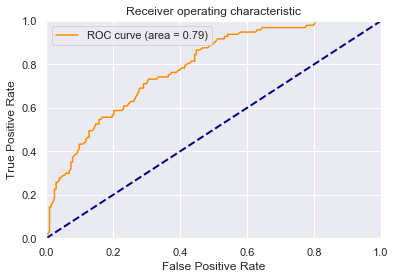

In [85]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
                                  
dt_model = RandomForestClassifier(criterion = 'entropy',n_jobs=2,n_estimators=500,random_state=9999 )
randomforest = dt_model.fit(X_train, y_train)
y_pred = randomforest.predict_proba(X_test)[:,1]
get_roc (y_test,y_pred)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [86]:
from sklearn.metrics import confusion_matrix

predicted = randomforest.predict(X_test)
confusion_matrix(y_test,predicted)

array([[188,  15],
       [ 65,  32]], dtype=int64)

### Q6 Show the list of the features importance( 1 Marks)

In [87]:
dt_model.feature_importances_

array([0.07371517, 0.09461558, 0.03551586, 0.03346291, 0.07759478,
       0.0194825 , 0.01096357, 0.01822613, 0.03000082, 0.00835255,
       0.05066439, 0.01008947, 0.02465557, 0.00966875, 0.01383823,
       0.01139953, 0.01087838, 0.00957894, 0.01625553, 0.0085238 ,
       0.01686303, 0.0024853 , 0.00186669, 0.0129304 , 0.00119386,
       0.00073436, 0.0051655 , 0.02102013, 0.00900548, 0.00586972,
       0.0166506 , 0.01276586, 0.01265057, 0.01632196, 0.01234712,
       0.01138076, 0.01651531, 0.00578492, 0.00819662, 0.01668543,
       0.00591607, 0.00868078, 0.01000714, 0.01322241, 0.01387225,
       0.01633468, 0.01183759, 0.01313565, 0.01691613, 0.00785994,
       0.00791068, 0.01339568, 0.01058389, 0.01267902, 0.0161903 ,
       0.00222876, 0.01105969, 0.01346906, 0.01303857, 0.00387527,
       0.00387036])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [88]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


In [89]:
#k fold
from sklearn import metrics
from sklearn.model_selection import KFold
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X,y):
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
    ytrain,ytest=y.iloc[train],y.iloc[test]
    model=dt_model
    model.fit(Xtrain,ytrain)
    Y_predict=model.predict(Xtest)
    acc.append((metrics.accuracy_score(ytest,Y_predict)))
print(acc)


[0.7395209580838323, 0.7657657657657657, 0.7807807807807807]


In [ ]:
#Calculate Mean score

In [90]:
print("Cross_VAlidated_Accuracy_Score: %0.03f (+/- %0.5f)" % (np.mean(acc),np.var(acc,ddof=1)))

Cross_VAlidated_Accuracy_Score: 0.762 (+/- 0.00044)


In [82]:
# Calculate score standard deviation using std()

In [91]:
print("Cross_VAlidated_Accuracy_Score core standard deviation using std():",np.std(acc))

Cross_VAlidated_Accuracy_Score core standard deviation using std(): 0.017050948410071938


# Q8 Print the confusion matrix( 1 Marks)

In [51]:

acc=metrics.accuracy_score(ytest,Y_predict)
acc

0.7807807807807807

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [56]:
metrics.confusion_matrix(ytest,Y_predict)

array([[216,  20],
       [ 53,  44]], dtype=int64)

In [92]:
acc=metrics.accuracy_score(ytest,Y_predict)
acc

0.7807807807807807

In [57]:
print(metrics.classification_report(ytest,Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       236
           1       0.69      0.45      0.55        97

   micro avg       0.78      0.78      0.78       333
   macro avg       0.75      0.68      0.70       333
weighted avg       0.77      0.78      0.77       333



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [62]:
#Hint: Use roc_curve
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

In [70]:
auc_roc = metrics.classification_report(ytest,Y_predict)
print(metrics.classification_report(ytest,Y_predict))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       236
           1       0.69      0.45      0.55        97

   micro avg       0.78      0.78      0.78       333
   macro avg       0.75      0.68      0.70       333
weighted avg       0.77      0.78      0.77       333



Text(0.5, 0, 'False Positive Rate')

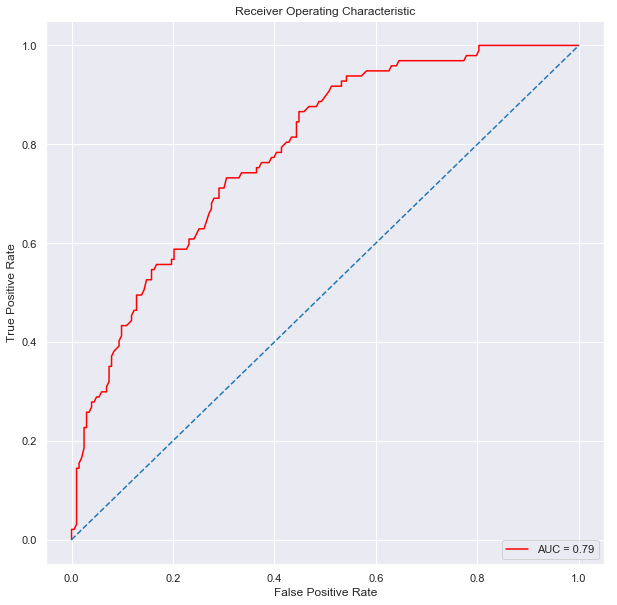

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [80]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(auc(false_positive_rate, true_positive_rate))

0.7859682088263673


### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [93]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [95]:
#from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [ ]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())